# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>

##  Objective: Predicting Energy Output at a Combined Cycle Power Plant

In this project, my goal was to build a regression model that can **accurately predict the net hourly electrical energy output** of a combined cycle power plant. As someone interested in the intersection of data and real-world business optimization, I found this dataset particularly compelling.

Predicting energy output isn't just an academic exercise — it has serious implications for power plant operations. Accurate forecasts allow businesses to plan ahead: whether it's managing fuel supply, scheduling equipment maintenance, or optimizing staffing. In competitive or deregulated energy markets, these predictions can even influence **when and how much energy to sell**, making this type of model essential for both operational efficiency and profit maximization.

---

### 📊 The Data I Used

The dataset includes **hourly average measurements** of environmental conditions and their corresponding energy output. Here’s a quick breakdown of the features I worked with:

- **Ambient Temperature (AT)**: Ranges from 1.81 to 37.11°C — the air temperature surrounding the power plant.
- **Ambient Pressure (AP)**: 992.89 to 1033.30 millibar — measures how much atmospheric pressure is exerted outside the plant.
- **Relative Humidity (RH)**: 25.56% to 100.16% — shows how saturated the air is with moisture.
- **Exhaust Vacuum (V)**: 25.36 to 81.56 cmHg — indicates how effectively exhaust gases are being removed.
- **Net Energy Output (PE)**: 420.26 to 495.76 MW — this is the target variable, representing the electricity generated in a single hour.

Each variable plays a role in the plant's thermodynamic efficiency, and understanding their relationships with output helped me build a model grounded in both data science and real-world engineering logic.




In [1]:
# Use the Python package installer pip to install the ucimlrepo package
!pip install ucimlrepo

# ucimlrepo stands for Unv. of California Irvine ML repository

# <font color='navy'>Step 2 Data Collection:</font>


In [2]:
### WE WILL GET THE DATA DIRECTLY FROM UCIML

# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UCI Machine Learning Repository using its ID
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Extract the features (independent variables) from the dataset as a pandas DataFrame
X = combined_cycle_power_plant.data.features

# Extract the targets (dependent variables) from the dataset as a pandas DataFrame
y = combined_cycle_power_plant.data.targets

# Note: The data is also provided on our LMS (Learning Management System) in case you prefer to use that source.


In [3]:
# Print the shape of the features DataFrame
print("X shape:", X.shape)

# Display the first 2 rows of the features DataFrame
X.head(2)


X shape: (9568, 4)


,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08


In [4]:
# Print the shape of the targets DataFrame
print("y shape:", y.shape)

# Display the first 2 rows of the targets DataFrame
y.head(2)

y shape: (9568, 1)


,PE
0,463.26
1,444.37


## My Approach and Training vs Testing Dataset

When working on this predictive modeling project, I kept in mind a fundamental principle of machine learning: we always need **two datasets** — one for training and one for testing.

I used the **training dataset** to build my model. This is where the model actually learns — it identifies patterns and relationships in the data and computes the model parameters (like the beta coefficients in linear regression). It’s the foundation for everything that comes afterward.

But building the model isn’t enough. I needed to know how well it would perform on **new, unseen data** — just like it would in a real-world situation. That’s where the **testing dataset** came in. I treated this data as a sort of “pretend future.” It hadn’t been used during training, so it allowed me to simulate how my model would behave when deployed in the field.

This step was critical. By evaluating the model on the test set, I was able to see how accurate and generalizable it really was. After all, a good model isn’t just one that performs well on training data — it’s one that can **reliably predict future outcomes**, and testing helps me validate exactly that.



* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [5]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [6]:
# Print the shape of the training features DataFrame
print("X_train shape:", X_train.shape)

# Print the shape of the testing features DataFrame
print("X_test shape:", X_test.shape)

# Print the shape of the training targets DataFrame
print("y_train shape:", y_train.shape)

# Print the shape of the testing targets DataFrame
print("y_test shape:", y_test.shape)



X_train shape: (6410, 4)
X_test shape: (3158, 4)
y_train shape: (6410, 1)
y_test shape: (3158, 1)


In [7]:
X_train.head(2) # this is the input variables with observations (input data) to be used to build a lin. regression model

,AT,V,AP,RH
7259,29.95,73.42,1011.44,66.32
7944,5.76,40.07,1013.22,62.99


In [8]:
y_train.head(2) # this is the output variable with observations (output data) to be used to build a lin. regression model

,PE
7259,432.81
7944,494.67


In [9]:
X_test.head(2) # this is the input variables with observations (input data) to be used to make predictions (yhat)

,AT,V,AP,RH
2513,19.64,48.06,1014.81,74.96
9411,28.26,69.23,1013.01,42.10


In [10]:
y_test.head(2) # this is the output variable with observations (output data) to be used to compute the error (y-yhat)

,PE
2513,455.27
9411,436.31


## Step 3: Data Processing

In this particular project, I was fortunate to work with a **clean and well-structured dataset**. All variables were numerical, and there were no missing values, outliers, or formatting issues to resolve — which meant the dataset was essentially ready for modeling right away.

However, I’m fully aware that this is a simplified scenario. In real-world projects, **data preprocessing** is often one of the most critical and time-consuming stages. Based on my experience and previous modules I’ve completed, I understand the importance of a thorough preprocessing pipeline that typically involves:

- **Feature extraction**: Like when I worked with the movies dataset and extracted cast, director, and writer information to create meaningful variables.
- **Handling missing values and outliers**: These can skew models or cause training to fail, so detecting and treating them is crucial.
- **Standardizing or scaling numerical features**: Especially important when using algorithms sensitive to feature magnitudes (e.g., KNN, SVM).
- **Encoding categorical variables**: Using techniques such as one-hot encoding or label encoding to make the data machine-readable.
- **Text data transformation**: If working with unstructured data like customer feedback, I know how to use techniques like TF-IDF or document-term matrices (DTM) to convert text into useful numerical features.

Although this dataset didn’t require much cleaning, I treat every project as an opportunity to **apply and reinforce best practices** in data preprocessing, ensuring that my models are built on a solid foundation.


In [11]:
# All I will do is to scale the data
# Import the StandardScaler class from scikit-learn's preprocessing module
# I will do this only for numerical variables.
# All dataset is numerical so I can do it for the entire dataset
columns = X_train.columns
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training features
scaler.fit(X_train)

# Transform the training features using the scaler
X_train = scaler.transform(X_train)

X_train = pd.DataFrame(X_train, columns = columns)
X_train.head()

,AT,V,AP,RH
0,1.385388,1.507499,-0.301404,-0.477307
1,-1.868925,-1.121784,-0.001342,-0.704233
2,1.316777,0.790852,-0.308147,-0.786689
3,1.772838,1.579242,-0.301404,-1.560825
4,-0.375628,-1.156474,-1.476368,0.693437


In [12]:
y_train.reset_index(drop = True, inplace = True)
y_train

,PE
0,432.81
1,494.67
2,442.32
3,427.36
4,466.68
...,...
6405,444.03
6406,474.67
6407,435.06
6408,471.13


# <font color='navy'>Step 4 EDA and Data Visualization:</font>



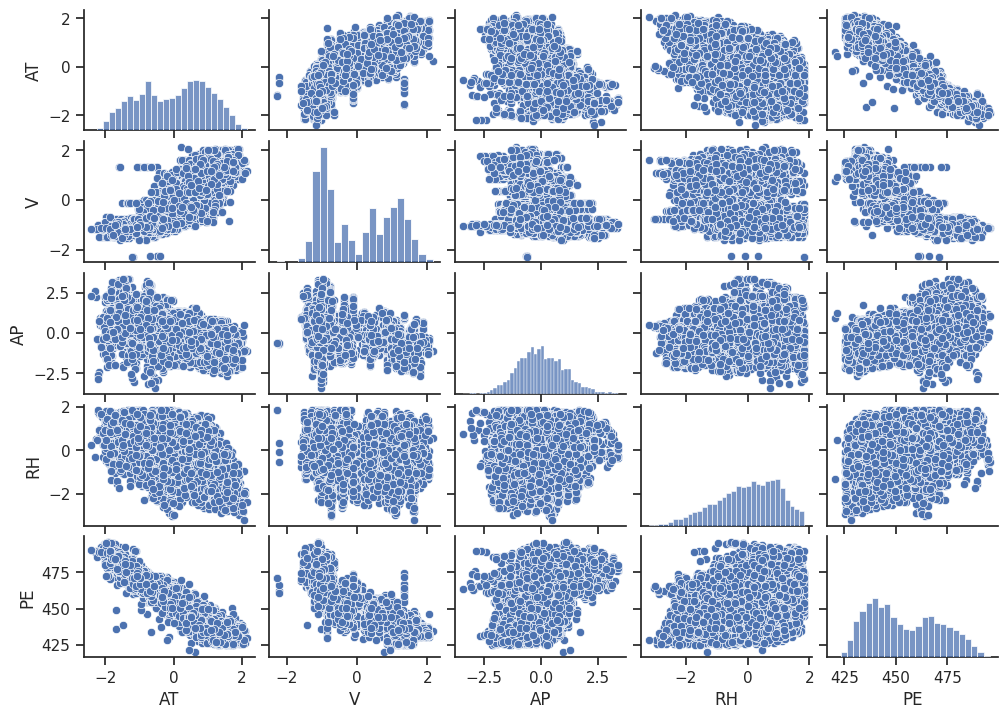

In [13]:
# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots to "ticks" using seaborn
sns.set_theme(style="ticks")

# Create a copy of the training features DataFrame
data = X_train.copy()

# Add the training targets to the copied DataFrame as a new column 'PE'
data['PE'] = y_train.values[:,0] # this is the output variable with observations (output data) to be used to build a lin. regression model


# Create a pair plot using seaborn to visualize the relationships between variables
ax = sns.pairplot(data)

# Set the height of the entire figure
ax.fig.set_figheight(7)

# Set the width of the entire figure
ax.fig.set_figwidth(10)

# Show the plot
plt.show()

* Approximately linear relationship between PE and the negative of AT
* Approximately linear relationship between PE nd the negative of V

# <font color='navy'>Step 5 Model Building - Linear Regression:</font>

In [14]:
# Import linear_model module from scikit-learn for linear regression
from sklearn import linear_model

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
# The fit method is used to train the linear regression model with the training data (X_train and y_train)
regr.fit(X_train, y_train)


LinearRegression()

In [15]:
X_train.head(2)

,AT,V,AP,RH
0,1.385388,1.507499,-0.301404,-0.477307
1,-1.868925,-1.121784,-0.001342,-0.704233


In [16]:
# Print the coefficients of the linear regression model
# These coefficients (regr.coef_) represent the values of beta1 through beta4 in the regression equation
print("Coefficients: \n", regr.coef_)


Coefficients: 
 [[-14.87791192  -2.89912628   0.29642443  -2.35861929]]


In [17]:
# Print the intercept of the linear regression model
# This intercept (regr.intercept_) represents the value of beta0 in the regression equation
print("Intercept: \n", regr.intercept_)


Intercept: 
 [454.36327613]


In [18]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)

In [19]:
X_test[0:1] # test data input

,AT,V,AP,RH
0,-0.001631,-0.49186,0.266691,0.111472


In [20]:
X_test[0:1].values # test data input in the format of a numpy array

array([[-0.00163054, -0.49186015,  0.2666915 ,  0.11147203]])

In [21]:
regr.coef_ #These coefficients (regr.coef_) represent the values of beta1 through beta4 in the regression equatio

array([[-14.87791192,  -2.89912628,   0.29642443,  -2.35861929]])

* **Make predictions**

In [22]:
# Lets make a prediction
# yhat = b0+ b1*x1 + b2*x2 + b3*x3 + b4*x4


yhat = np.sum(regr.coef_*X_test[0:1].values)+regr.intercept_[0]
print(yhat)

455.62963360812466


In [23]:
y_test[0:1] # this is the actual. compare it with yhat

,PE
2513,455.27


In [24]:
# Use the linear regression model to make predictions on the test set
# The predict method calculates the predicted values (yhat) for the test features (X_test)
pred = regr.predict(X_test)

# Print the array of predicted values
pred


array([[455.62963361],
       [438.72924417],
       [434.14156621],
       ...,
       [428.87026751],
       [469.78037233],
       [446.43264723]])

In [25]:
# Calculate the error between the actual target values (y_test) and the predicted values (pred)
# This is done by subtracting the predicted values from the actual target values
error = y_test.values - pred

# Print the array of errors
error


array([[-0.35963361],
       [-2.41924417],
       [ 6.53843379],
       ...,
       [ 4.56973249],
       [ 0.67962767],
       [ 1.97735277]])

* **Compute performance**
>* **RMSE:** RMSE, or Root Mean Square Error, tells you how accurate a prediction is on average, by looking at the squared difference between what was predicted and what actually happened. It's important for evaluating machine learning models.
>* **Rsquared:** R-squared is another metric used in regression analysis to assess how well a model fits the data.expand_more It essentially tells you what proportion of the variance in the output variable can be explained by the input variables in your model. Imagine it as a percentage between 0 and 100, where 0% means the model doesn't explain any of the variation and 100% means it explains everything.


In [26]:
# Import the mean_squared_error and r2_score functions from scikit-learn's metrics module
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the math module for mathematical operations
import math

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values
rmse = math.sqrt(mean_squared_error(y_test, pred))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance
r2 = r2_score(y_test, pred)

# Print the Root Mean Squared Error (RMSE) with 2 decimal places
print("Root Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Root Mean squared error: 4.61
Coefficient of determination: 0.93


In [27]:
y_test.values[:,0] - pred[:,0]

array([-0.35963361, -2.41924417,  6.53843379, ...,  4.56973249,
        0.67962767,  1.97735277])

**Checking Linear Regression Assumption:**
1. Homoscedasticity





<Axes: >

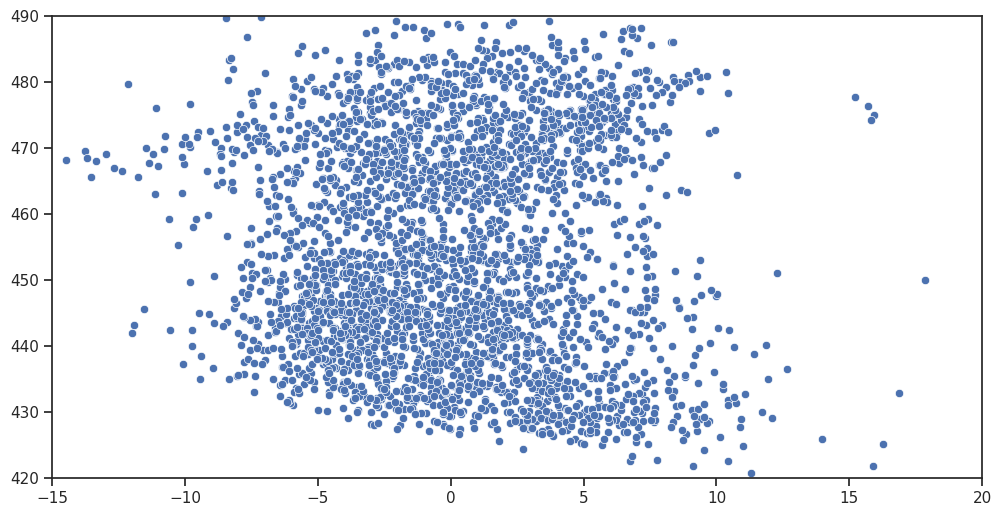

In [28]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x = y_test.values[:,0] - pred[:,0], y = pred[:,0])
#plots the error vs. predicted
limits = ax.set(xlim=(-15, 20), ylim=(420, 490)) #sets the limit for x and y axis
ax

* A probability plot of residuals in linear regression shows whether the residuals (the differences between observed and predicted values) follow a normal distribution. If the points on the plot closely follow a straight line, it indicates that the residuals are normally distributed, which is an assumption for many statistical tests and models
* Deviations from this line suggest that the residuals may not be normally distributed, which could indicate potential problems with the model.

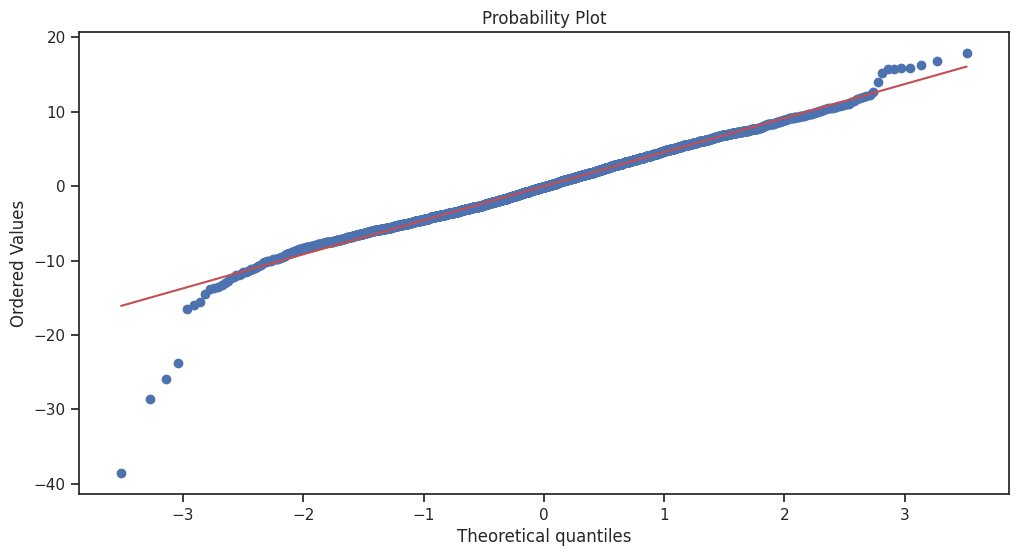

In [29]:
from scipy import stats

fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = stats.probplot(y_test.values[:,0] - pred[:,0], plot=ax, fit=True)
# generates the normality plot

# <font color='navy'>Step 5 Model Building - Decision Trees:</font>

In [30]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Regressor object with a maximum depth of 3
reg_tree = tree.DecisionTreeRegressor(max_depth=5)

# Train the decision tree regressor using the training data
reg_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = reg_tree.predict(X_train)

# Make predictions on the test data
pred_test = reg_tree.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the training data
rmse_train = math.sqrt(mean_squared_error(pred_train, y_train))

# Calculate the Coefficient of Determination (R^2 score) for the training data
r2_train = r2_score(pred_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the test data
rmse_test = math.sqrt(mean_squared_error(pred_test, y_test))

# Calculate the Coefficient of Determination (R^2 score) for the test data
r2_test = r2_score(pred_test, y_test)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error train data: %.2f" % rmse_train)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination train data: %.2f" % r2_train)

# Print the Root Mean Squared Error (RMSE) for the test data with 2 decimal places
print("Mean squared error test data: %.2f" % rmse_test)

# Print the Coefficient of Determination (R^2 score) for the test data with 2 decimal places
print("Coefficient of determination test data: %.2f" % r2_test)


Mean squared error train data: 4.26
Coefficient of determination train data: 0.93
Mean squared error test data: 4.51
Coefficient of determination test data: 0.93


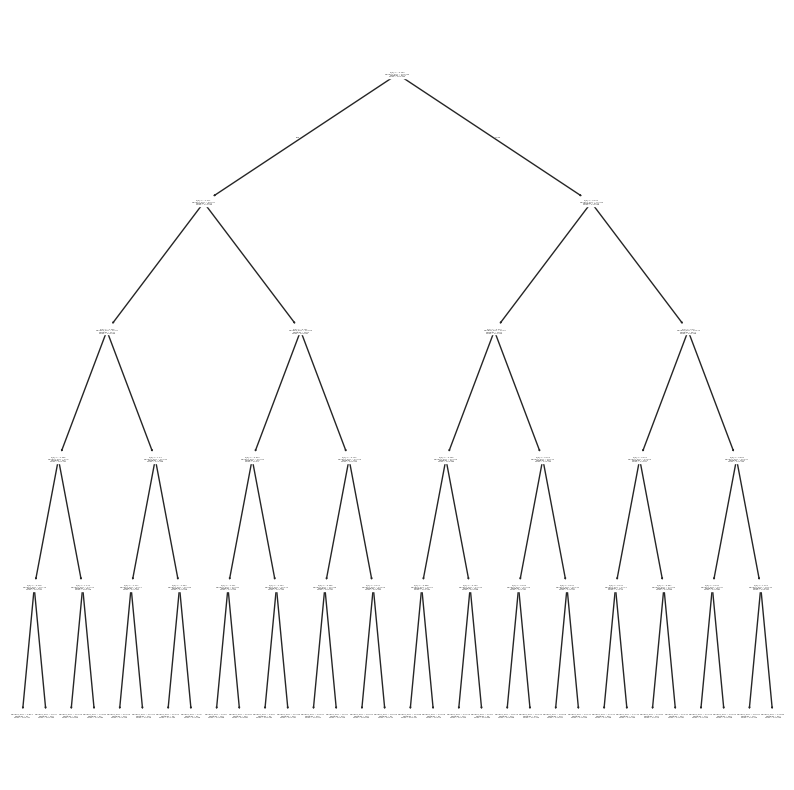

In [31]:
# Import the tree module from scikit-learn
from sklearn import tree

# Set the size of the figure for the plot
plt.figure(figsize=(10,10))

# Plot the decision tree using scikit-learn's plot_tree function
tree.plot_tree(reg_tree)

# Display the plot
plt.show()


In [32]:
reg_tree.feature_importances_

array([0.95434567, 0.03962106, 0.00148341, 0.00454986])

<Axes: >

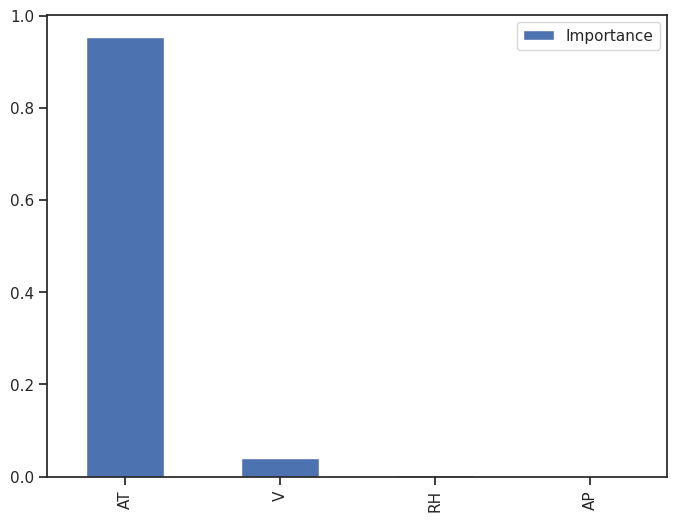

In [33]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(reg_tree.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## --- End of Regression 1 ---
## --- Start of Regression 2 ---

# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>

* In the real estate world, machine learning (ML) is a game-changer for predicting house selling prices. By analyzing vast amounts of data, ML models can uncover complex patterns and factors that influence price beyond just square footage and location.
* This translates to more accurate valuations, allowing realtors to:  advise sellers on competitive listing prices, attract serious buyers with realistic expectations, and close deals faster. Ultimately, ML helps businesses make data-driven decisions to optimize the entire selling process.
* Our goal here is to use past house sales data with input and output variables (Saleprice) to predict how much a house will be sold in the future.
* I got the edata from Kaggle directory.


In [34]:
import pandas as pd

# Using the direct link to the file

# Read the CSV file using Pandas (pd)
url = 'https://drive.google.com/file/d/1qGvJNZRryren302mAMjRs_PPNrO-l8Pr/view?usp=sharing'

# Extracting the file ID from the URL
file_id = url.split('/')[-2]

# Constructing the download link for the file
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Reading the CSV file from the provided link
data = pd.read_csv(download_link)


#READ BELOW COMMENT CAREFULLY
# Use the below code only if you reach download limit on G-Drive
#data = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/housing_data.csv')

# Use the below code only if you cannot load the data using previous two methods
#data = pd.read_csv('/content/housing_data.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.

* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [35]:
# Before I do train test split, I want to remove variables that are all na such as PoolQC	Fence.
# I also want to remove the ID variable

# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if more than 70% of the values in the column are NaN
    if data[i].isna().sum() / len(data) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the DataFrame
        data = data.drop(i, axis=1)

# Drop the 'Id' column from the DataFrame as it is not needed for analysis
data = data.drop('Id', axis=1)

# Print the names of the columns that were removed
col_names


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [36]:
# split input and output variables

# Define the target variable 'y' as the 'SalePrice' column from the DataFrame
y = data['SalePrice'].copy()

# Define the feature variables 'X' by dropping the 'SalePrice' column from the DataFrame
X = data.drop('SalePrice', axis=1).copy()


In [37]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [38]:
X_train.head() # first x records

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
858,20,RL,60.0,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2009,WD,Normal
943,90,RH,82.0,7136,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2007,WD,Normal
534,120,RH,34.0,4058,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,6,2007,WD,Normal
934,80,RL,70.0,8163,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,3,2006,WD,Normal
1335,60,RL,NaN,10316,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,184,0,0,0,0,0,6,2008,WD,Normal


In [39]:
y_train.head() # first x records

,SalePrice
858,109500
943,145000
534,133000
934,143000
1335,235000


## Step 3: Data Processing

While the dataset I used in this project was already clean and well-prepared, I fully recognize that this is rarely the case in real-world scenarios.

In practice, I always follow a structured **data preprocessing workflow**—something I’ve learned and applied across previous modules and hands-on projects. Here's how I typically approach it:

- **Feature Extraction**: Just like in the movies dataset exercise, where I extracted useful attributes such as cast members, directors, and writers, I understand the importance of crafting meaningful features from raw data.
  
- **Handling Missing Values & Outliers**: I know how essential it is to detect and treat missing data or outliers early, as they can distort model performance or lead to inaccurate predictions.

- **Scaling and Standardizing**: For algorithms that are sensitive to feature magnitude, I make sure to scale or standardize numeric variables to bring them to a uniform range.

- **Encoding Categorical Variables**: I use techniques like one-hot encoding or label encoding to convert non-numeric data into numerical formats that machine learning algorithms can interpret.

- **Processing Text Data**: When working with textual inputs like user feedback or reviews, I transform them into numerical features using techniques like **TF-IDF (Term Frequency-Inverse Document Frequency)** or **document-term matrices (DTM)**.

Even though this particular dataset didn’t require much preprocessing, I always prepare to carry out a full data cleaning pipeline when necessary. Proper preprocessing is what lays the groundwork for a strong, reliable model.


## <font color='maroon'>Step 3.1 Data processing: data cleaning - identify and deal with missing data</font>



In [40]:
for i in X_train.columns:
  if X_train[i].isna().sum() > 0:
    print(i)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [41]:
# determine categorical input variables
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
# determine numerical input variables
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [42]:
# Import the nan constant from the math module
from math import nan

# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for imputing missing numerical values with the mean of the column
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Create a SimpleImputer object for imputing missing categorical values with the most frequent value of the column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")


# Fit the numerical imputer on the training data for numerical columns
# This calculates the mean of each numerical column in the training set
num_imputer.fit(X_train[numerical_cols])

# Fit the categorical imputer on the training data for categorical columns
# This calculates the most frequent value of each categorical column in the training set
cat_imputer.fit(X_train[categorical_cols])

# Transform the numerical columns in the training data by replacing missing values with the calculated means
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])

# Transform the categorical columns in the training data by replacing missing values with the most frequent values
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])


In [43]:
for i in X_train.columns:
  if X_train[i].isna().sum() > 0:
    print(i)


## <font color='maroon'>Step 3.2 Data processing: create new features</font>

In [44]:
X_train['Age'] = X_train['YrSold'] - X_train['YearBuilt']

## <font color='maroon'>Step 3.3 Data processing: scale data data</font>

In [45]:
# Select the numerical columns (columns of type int64 and float64) from the training data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
numerical_cols

# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object for standardizing numerical features
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
# This calculates the mean and standard deviation for each numerical column in the training set
scaler.fit(X_train[numerical_cols])

# Transform the numerical columns in the training data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])


## <font color='maroon'>Step 3.4 Data processing: Encode categorical variables</font>
* Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.



In [46]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns (columns of type object) from the training data
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
categorical_cols

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the training data
enc.fit(X_train[categorical_cols])

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_train[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the training data to avoid redundancy
X_train.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the training data to ensure proper alignment when concatenating
X_train.reset_index(drop=True, inplace=True)

# Concatenate the original training data with the new 'dummies' DataFrame along columns (axis=1)
X_train = pd.concat([X_train, dummies], axis=1)

# Display the first two rows of the modified training data to verify changes
X_train.head(2)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.864802,-0.443124,-0.372168,-0.814149,-0.538037,-0.326153,-1.133482,-0.581175,-0.955582,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.800697,0.593420,-0.320755,-0.074362,0.371255,-0.863995,-1.719060,1.798958,0.100191,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='navy'>Step 4 - Visualization </font>

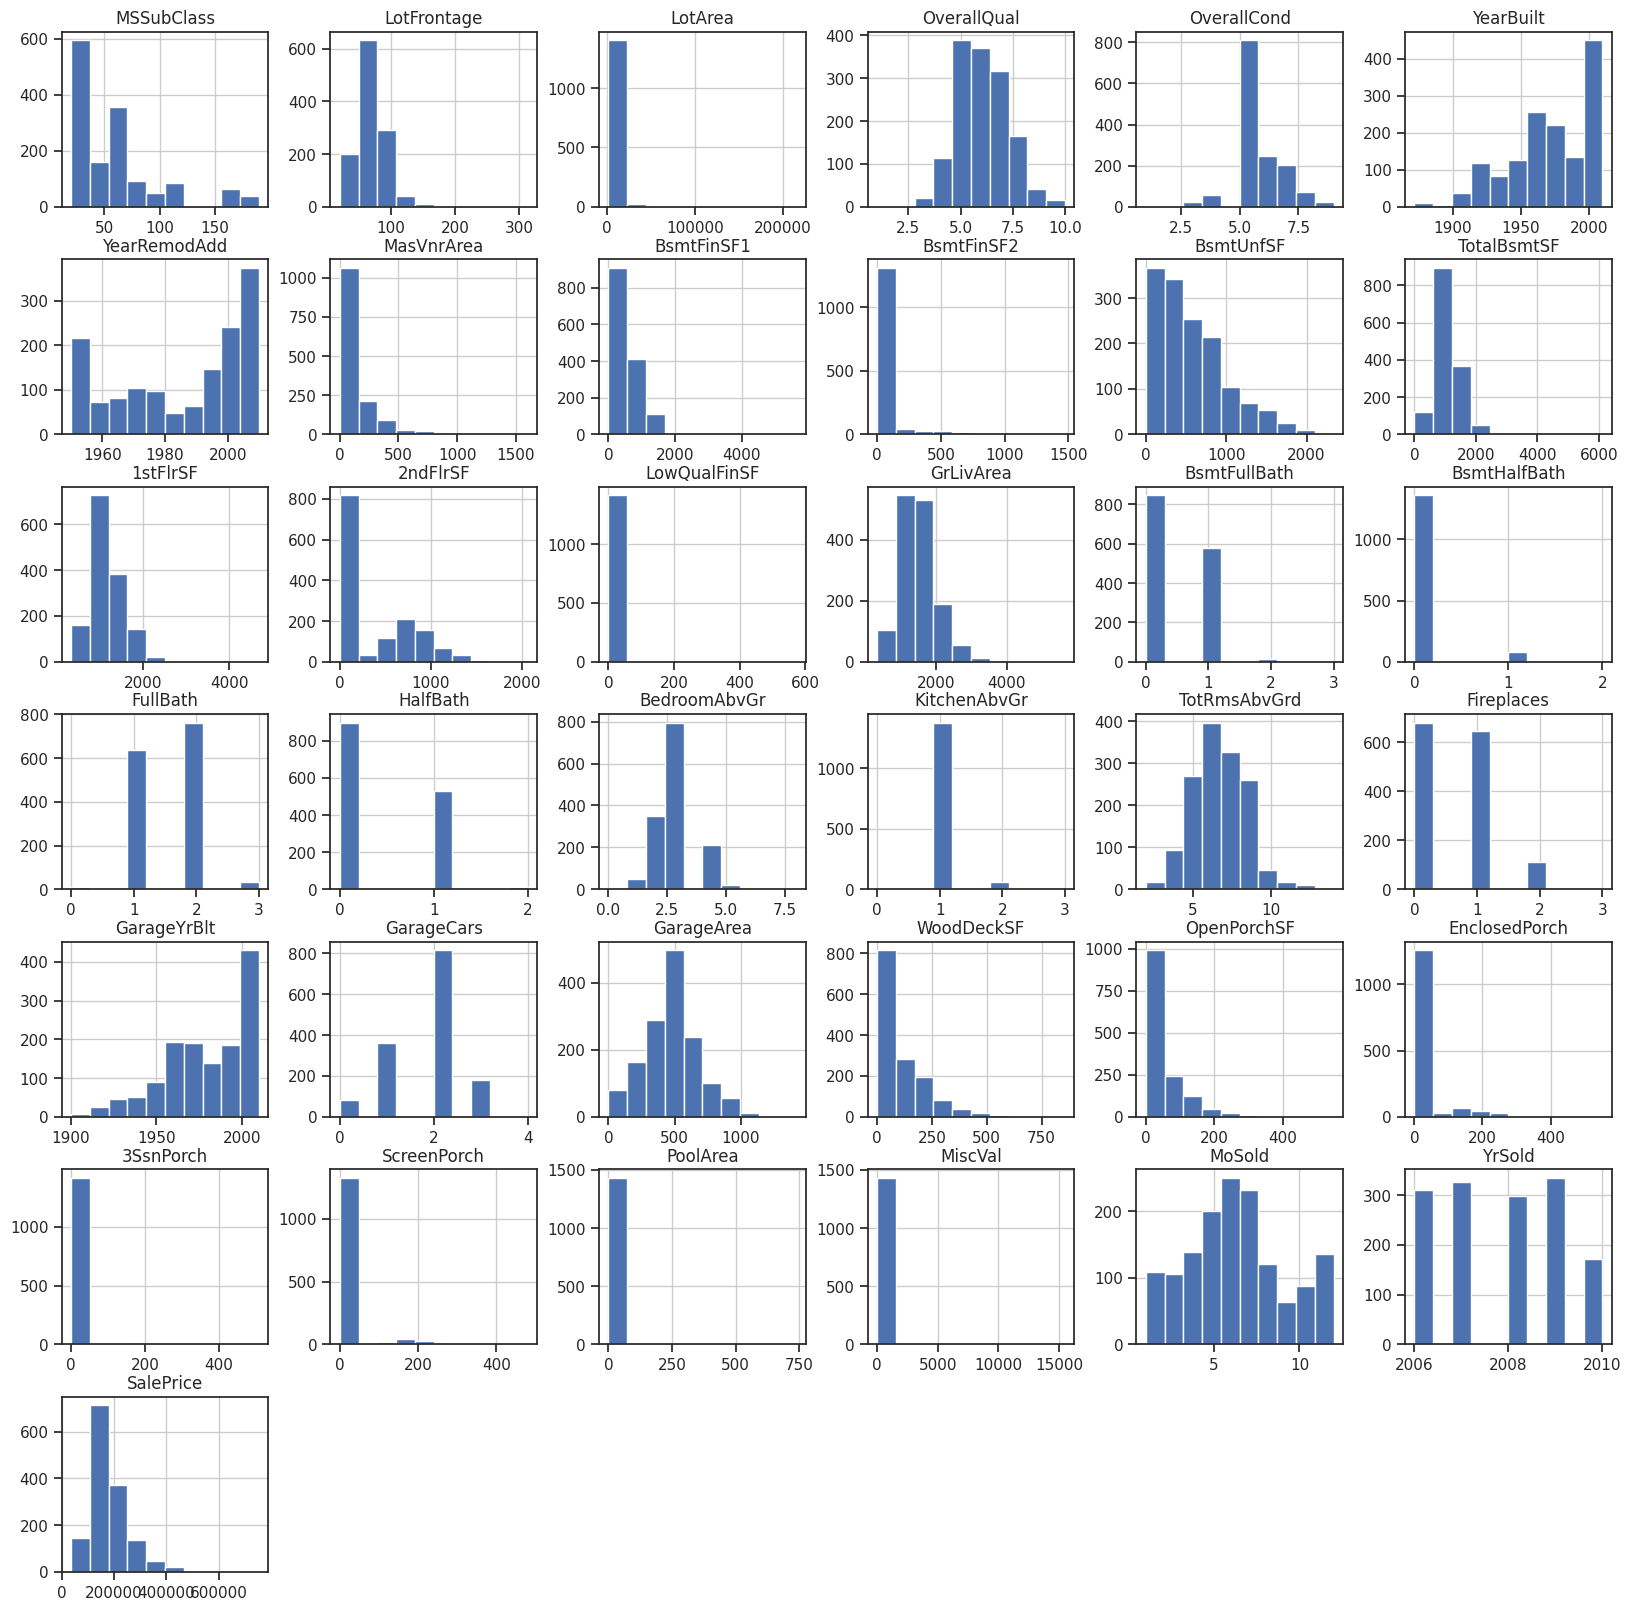

In [47]:
#Data Visualizatio
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(20,20))
plt.show()

# <font color='navy'>Step 5 - Model Building and Predicting Output Variable on Test Data </font>

## <font color='maroon'>Step 5.1 - Model Building and Predicting Output Variable on Test Data: Linear Regression </font>

In [48]:
# Import the datasets and linear_model modules from scikit-learn
from sklearn import datasets
from sklearn import linear_model

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the linear regression model using the training data
# The fit method is used to train the linear regression model with the training features (X_train) and target values (y_train)
regr.fit(X_train, y_train)


LinearRegression()

* Let's compute performance metrics for the training data to see how the model performs
* To do this we will need to make predictions for the training data as well.

In [49]:
# Import the mean_squared_error and r2_score functions from scikit-learn's metrics module
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the math module for mathematical operations
import math

# Make predictions on the training data using the trained linear regression model
pred_train = regr.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values for the training data
rmse = math.sqrt(mean_squared_error(y_train, pred_train))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance on the training data
r2 = r2_score(y_train, pred_train)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Mean squared error: 17114.46
Coefficient of determination: 0.95


* Making predictions for test set and Performance calculation with test set
* Before we do this, the X_test dataset MUST GO THROUGH THE SAME DATA PROCESSING PIPELINE

In [50]:
# Replacing missing values in the test data

# Select the numerical columns (columns of type int64 and float64) from the test data
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select the categorical columns (columns of type object) from the test data
categorical_cols = X_test.select_dtypes(include=['object']).columns.tolist()

# Transform the numerical columns in the test data by replacing missing values with the calculated means
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Transform the categorical columns in the test data by replacing missing values with the most frequent values
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Adding new features

# Create a new feature 'Age' by subtracting 'YearBuilt' from 'YrSold'
X_test['Age'] = X_test['YrSold'] - X_test['YearBuilt']

# Scaling numerical variables

# Select the updated numerical columns (after adding 'Age') from the test data
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Transform the numerical columns in the test data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Encoding categorical variables

# Select the updated categorical columns (columns of type object) from the test data
categorical_cols = X_test.select_dtypes(include=['object']).columns.tolist()

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_test[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the test data to avoid redundancy
X_test.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the test data to ensure proper alignment when concatenating
X_test.reset_index(drop=True, inplace=True)

# Concatenate the original test data with the new 'dummies' DataFrame along columns (axis=1)
X_test = pd.concat([X_test, dummies], axis=1)

# Display the first two rows of the modified test data to verify changes
X_test.head(2)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.864802,3.373242,2.042153,-0.074362,-0.538037,-0.393384,-1.231079,0.049026,0.438299,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864802,-0.443124,0.113574,-0.074362,-0.538037,-0.796765,-1.719060,0.577944,-0.222649,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Make predictions on the test data using the trained linear regression model
pred_test = regr.predict(X_test)

# Convert the array of predictions into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Reset the index of the actual target values (y_test) to ensure proper alignment with predictions
y_test.reset_index(drop=True, inplace=True)

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,227604.434378,215000
1,112507.145314,119200
2,193714.489077,234000
3,252833.345398,180000
4,245334.072572,226000


In [52]:
# Print the minimum value of the training target values (y_train)
print(min(y_train))

# Print the maximum value of the training target values (y_train)
print(max(y_train))


35311
755000


In [53]:
# Drop rows from the predictions DataFrame where the predicted values ('preds') are less than 30,000
predictions.drop(predictions[predictions['preds'] < 30000].index, axis=0, inplace=True)

# Drop rows from the predictions DataFrame where the predicted values ('preds') are greater than 800,000
predictions.drop(predictions[predictions['preds'] > 800000].index, axis=0, inplace=True)


In [54]:
# Calculate the Root Mean Squared Error (RMSE) between the filtered predicted and actual values
rmse = math.sqrt(mean_squared_error(predictions['preds'], predictions['actual']))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance on the filtered data
r2 = r2_score(predictions['preds'], predictions['actual'])

# Print the Root Mean Squared Error (RMSE) with 2 decimal places
print("Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Mean squared error: 33103.41
Coefficient of determination: 0.83


**Checking the Linear Regression Assumption:**
1. Homoscedasticity


<Axes: xlabel='None', ylabel='preds'>

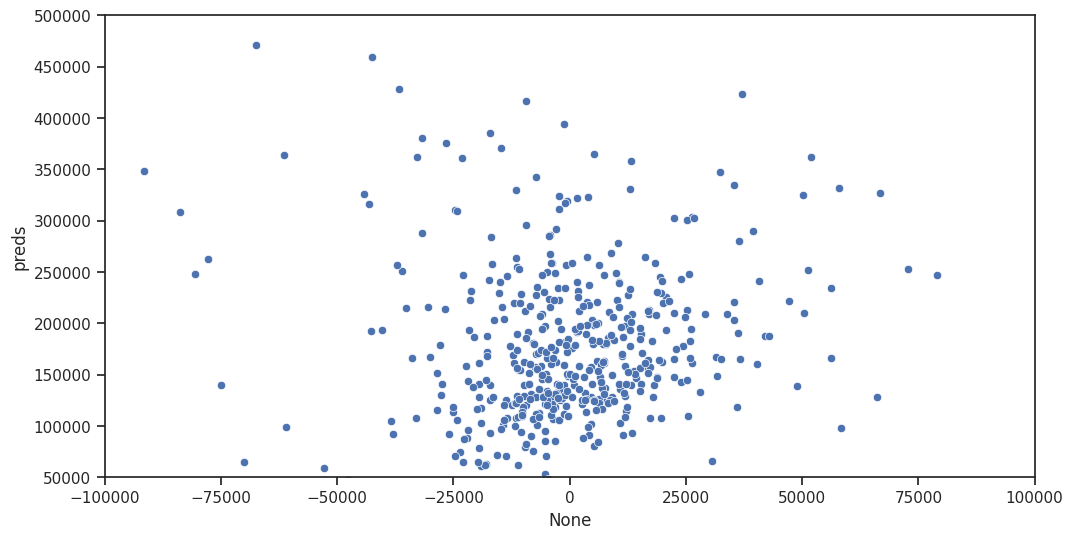

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of the predicted values against the actual values
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x = predictions['preds'] - predictions['actual'], y = predictions['preds'])
#plots the error vs. predicted
limits = ax.set(xlim=(-100000, 100000), ylim=(50000, 500000)) #sets the limit for x and y axis
ax

**Let's check the normality assumption**
* A probability plot of residuals in linear regression shows whether the residuals (the differences between observed and predicted values) follow a normal distribution. If the points on the plot closely follow a straight line, it indicates that the residuals are normally distributed, which is an assumption for many statistical tests and models
* Deviations from this line suggest that the residuals may not be normally distributed, which could indicate potential problems with the model.

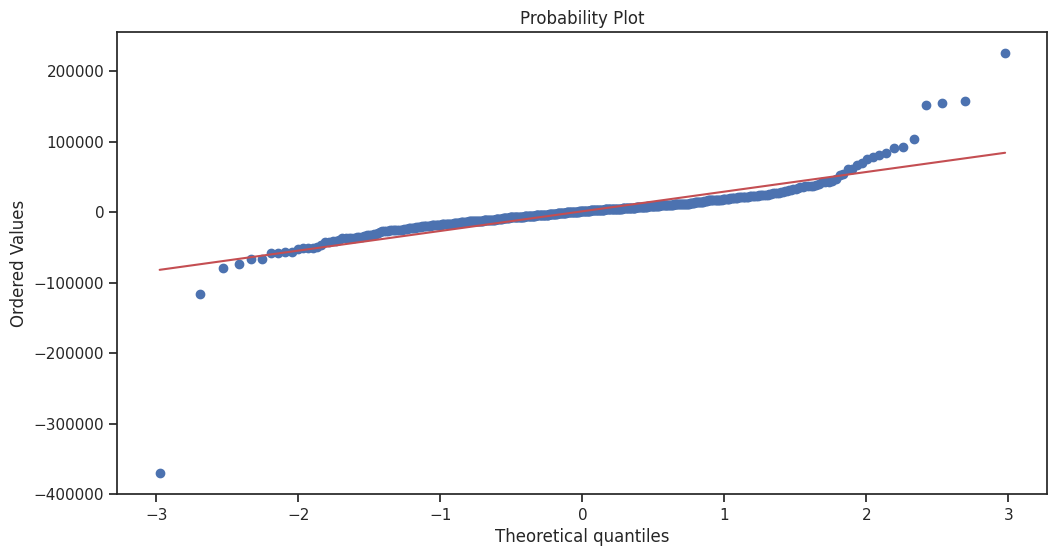

In [56]:
from scipy import stats

fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = stats.probplot(predictions['actual'] - predictions['preds'], plot=ax, fit=True)
# generates the normality plot

## <font color='maroon'>Step 5.2 - Model Building - Decision Tree Algorithm </font>

In [57]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Regressor object (without specifying max_depth)
reg_tree = tree.DecisionTreeRegressor()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree regressor using the training data
reg_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = reg_tree.predict(X_train)

# Make predictions on the test data
pred_test = reg_tree.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the training data
rmse_train = math.sqrt(mean_squared_error(pred_train, y_train))

# Calculate the Coefficient of Determination (R^2 score) for the training data
r2_train = r2_score(pred_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the test data
rmse_test = math.sqrt(mean_squared_error(pred_test, y_test))

# Calculate the Coefficient of Determination (R^2 score) for the test data
r2_test = r2_score(pred_test, y_test)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error train data: %.2f" % rmse_train)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination train data: %.2f" % r2_train)

# Print the Root Mean Squared Error (RMSE) for the test data with 2 decimal places
print("Mean squared error test data: %.2f" % rmse_test)

# Print the Coefficient of Determination (R^2 score) for the test data with 2 decimal places
print("Coefficient of determination test data: %.2f" % r2_test)


Mean squared error train data: 0.00
Coefficient of determination train data: 1.00
Mean squared error test data: 45440.93
Coefficient of determination test data: 0.66


In [58]:
# Convert the array of predictions on the test data into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,167000.0,215000
1,135000.0,119200
2,192500.0,234000
3,320000.0,180000
4,239799.0,226000


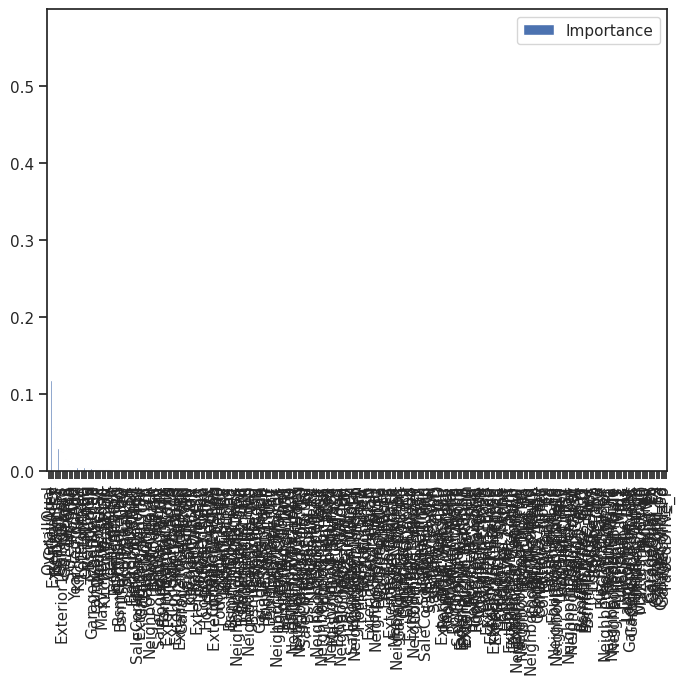

In [59]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree regressor
# The index of the DataFrame will be the feature names from the training data
# The column will be the importance scores
feat_importances = pd.DataFrame(reg_tree.feature_importances_, index=X_train.columns, columns=["Importance"])

# Sort the DataFrame by the importance scores in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances as a bar chart
# The plot will have a size of 8x6 inches
feat_importances.plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()


In [60]:
# Create a DataFrame for the feature importances calculated by the decision tree regressor
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(reg_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Display the DataFrame of variable importances
var_importance


,IMPORTANCE,VARIABLE
3,0.570735,OverallQual
15,0.118874,GrLivArea
155,0.057480,ExterQual_Ex
8,0.038517,BsmtFinSF1
11,0.030639,TotalBsmtSF
...,...,...
240,0.000000,GarageCond_Ex
241,0.000000,GarageCond_Fa
242,0.000000,GarageCond_Gd
243,0.000000,GarageCond_Po


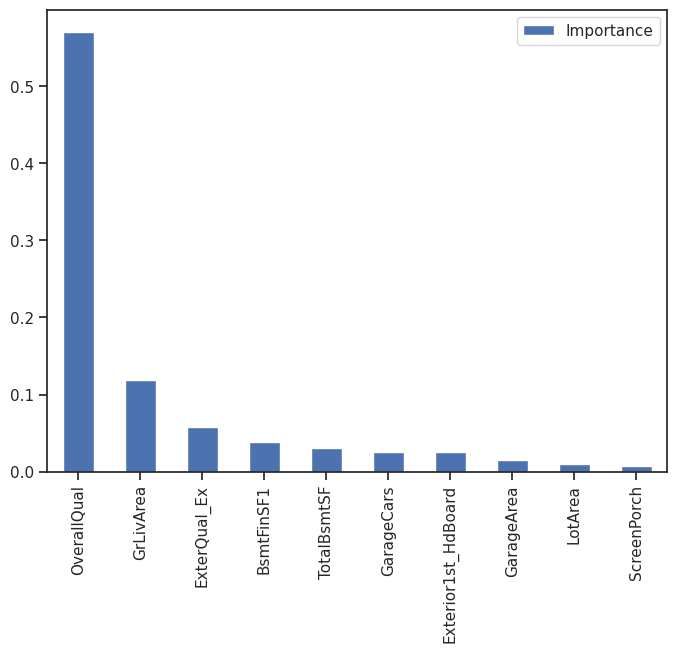

In [61]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
feat_importances[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()
